<div style='text-align: center;'>
<span style="color:#000000; font-family: 'Garamond'; font-weight: 700; font-size: 2em;"> Analysis and use of different types of classification algorithms for handwritten number recognition </span>
</div>

<p><b> December 4th, 2022</b></p>  

------------------------------------------------------------------------------------------------------------------------------


<div style='text-align: center;'>
<span style="color:#000000; font-family: 'Times new roman'; font-weight: 700; font-size: 2em;"> 1. Loading data & implementation of functions </span>
</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from pathlib import Path

# Loading training and testing data as datasets which are in different files

train = np.genfromtxt(str(Path.cwd())+'/Data/DigitsTraining.csv', delimiter=',')
test = np.genfromtxt(str(Path.cwd())+'/Data/DigitsTesting.csv', delimiter=',')

# Segmentation tasks on datasets
# Separation of labels and data from each dataset

X_train = train[:, 1:]
y_train = train[:, 0]
X_test = test[:, 1:]
y_test = test[:, 0]

# Creation of some important functions
# Line brings back the regression line y = ax + b
# a y b are gotten from the equation w[0]+w[1]x1+w[2]X2=0

    
def line(w, data=None):
    a = - w[1] / w[2]
    b = - w[0] / w[2]
    x_line = np.linspace(0.4, 1, 100)
    if data is not None:
        return a*data + b
    else:
        return a*x_line + b
# Function which calculates the mean simmetry of an image 

def symmetry(X):
    X_shapes = (16, 16)
    X = X.reshape(X_shapes)
   
    # We create two new matrixes which are horizontally and vertically flipped versions of the original matrix

    image_FlipV=np.flip(X,axis=1)
    image_FlipH=np.flip(X,axis=0)
    # Following the right equation the horizontal and vertical simmetry is calculated as Sv and Sh
    Sv=((np.abs(X-image_FlipV)).sum())/256
    Sh=((np.abs(X-image_FlipH)).sum())/256
    # The mean simmetry is the mean of the Horizontal and vertical simmetries or Sh and Sv, respectively
    symm=(Sv+Sh)/2

    return symm

# Function to calculate the mean intensity of an image or average intensity

def intensity(X):
    X_shapes = (16, 16)
    X = X.reshape(X_shapes)
    AVG_intencity=(X.sum())/256
    return AVG_intencity



In [2]:
# Training data information
print("Número de imagenes:"+ str(X_train.shape[0]))
print("Número de caracteristicas:"+ str(X_train.shape[1]))

# Testing data information
print("Número de imagenes:"+ str(X_test.shape[0]))
print("Número de caracteristicas:"+ str(X_test.shape[1]))


Número de imagenes:7291
Número de caracteristicas:256
Número de imagenes:2007
Número de caracteristicas:256


<div style='text-align: center;'>
<span style="color:#000000; font-family: 'Times new roman'; font-weight: 700; font-size: 2em;"> 2. Preparing data and building the final dataset for training data </span>
</div>

In [3]:
# Preparing the data
# Extracting images from numbers one and five as Digit1 y Digit2 through a segmentation process

Digit1 = X_train[y_train == 5]
y_train_Digit1 = np.ones(len(Digit1))
Digit2 = X_train[y_train == 1]
y_train_Digit2 = -np.ones(len(Digit2))

# I calculate the mean simmetry and average intensity for each image

symm_Digit2 = [symmetry(im) for im in Digit2]
symm_Digit1 = [symmetry(im) for im in Digit1]

avg_intensity_Digit1 = [intensity(im) for im in Digit1]
avg_intensity_Digit2 = [intensity(im) for im in Digit2]

# Intensity and simmetry as new characteristics in the new dataset
# the new matrix has the same number of samples or rows
# There are just two characteristics or columns intensity(x1) and simmetry(x2)
# new_Digit1 and new_Digit2 has data related to each digit

new_Digit1 = np.c_[avg_intensity_Digit1, symm_Digit1]
new_Digit2 = np.c_[avg_intensity_Digit2, symm_Digit2]

# Finally, I combine new_Digit1 and new_Digit2 as one final dataset X_new
# We need another dataset with all the labels y_new

X_new = np.r_[new_Digit1, new_Digit2]
y_new = np.r_[y_train_Digit1, y_train_Digit2]

# randomizing both data using random methods as randint 
# each generated number will be saved as a list and used as indexes in order to have balanced data of each number 
# The same process has to be made for testing data 


R_num = np.random.randint(X_new.shape[0], size = (X_new.shape[0],))
X_new = X_new[R_num]
y_new = y_new[R_num]


<div style='text-align: center;'>
<span style="color:#000000; font-family: 'Times new roman'; font-weight: 700; font-size: 2em;"> 3. Examples </span>
</div>

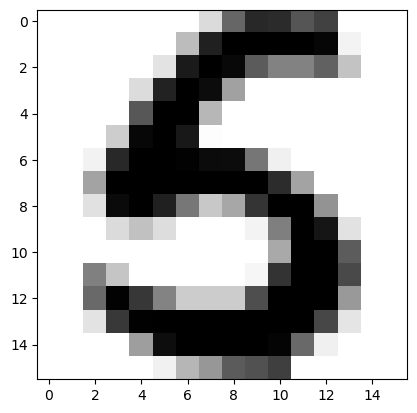

In [4]:
# Examples, we have to indicate the max and min values to make a right graph 

plt.imshow(Digit1[5].reshape(16,16),vmin=0,vmax=1,cmap='gray')

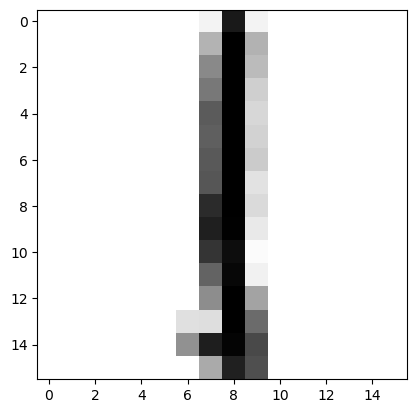

In [5]:
plt.imshow(Digit2[1].reshape(16,16),vmin=0,vmax=1,cmap='gray')


In [6]:
# New Training data information

print("Número de ejemplos:"+ str(X_new.shape[0]))
print("Número de caracteristicas:"+ str(X_new.shape[1]))

print("Número de ejemplos con 5: "+str(len(y_train_Digit1)))
print("Número de ejemplos con 1: "+str(len(y_train_Digit2)))


Número de ejemplos:1561
Número de caracteristicas:2
Número de ejemplos con 5: 556
Número de ejemplos con 1: 1005


In [7]:
print("forma del nuevo conjunto de entrenamiento en X:",X_new.shape)
print("forma del nuevo conjunto de entrenamiento en Y:",y_new.shape)


forma del nuevo conjunto de entrenamiento en X: (1561, 2)
forma del nuevo conjunto de entrenamiento en Y: (1561,)


<div style='text-align: center;'>
<span style="color:#000000; font-family: 'Times new roman'; font-weight: 700; font-size: 2em;"> 4. Preparing data and building the final dataset for testing data </span>
</div>

In [8]:
# Process for testing data

X_test_Digit1 = X_test[y_test == 5]
y_test_Digit1 = np.ones(len(X_test_Digit1))
X_test_Digit2 = X_test[y_test == 1]
y_test_Digit2 = -np.ones(len(X_test_Digit2))

X_test_new = np.r_[X_test_Digit1, X_test_Digit2]
y_test_new = np.r_[y_test_Digit1, y_test_Digit2]

R = np.random.randint(X_test_new.shape[0], size = (X_test_new.shape[0],))

X_test_new = X_test_new[R]
y_test_new = y_test_new[R]

avg_int_test = [intensity(im) for im in X_test_new]

test_symm = [symmetry(im) for im in X_test_new]

X_test_final = np.c_[avg_int_test, test_symm]



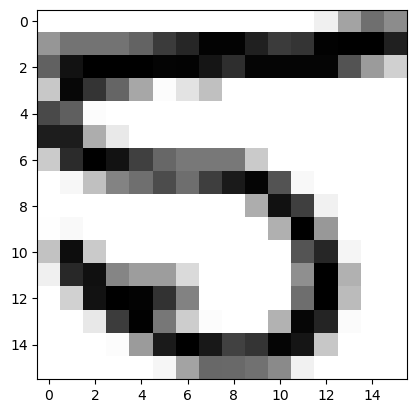

In [9]:
# Examples of the new testing dataset
plt.imshow(X_test_Digit1[5].reshape(16,16),vmin=0,vmax=1,cmap='gray')

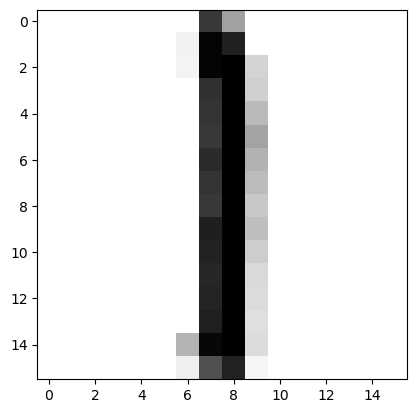

In [10]:
plt.imshow(X_test_Digit2[1].reshape(16,16),vmin=0,vmax=1,cmap='gray')

In [11]:
# New Testing data information
print("Número de ejemplos:"+ str(X_test_final.shape[0]))
print("Número de caracteristicas:"+ str(X_test_final.shape[1]))

print("Número de ejemplos con 5: "+str(len(y_test_Digit1)))
print("Número de ejemplos con 1: "+str(len(y_test_Digit2)))

Número de ejemplos:424
Número de caracteristicas:2
Número de ejemplos con 5: 160
Número de ejemplos con 1: 264


In [12]:
print("forma del nuevo conjunto de prueba en X:",X_test_final.shape)
print("forma del nuevo conjunto de prueba en Y:",y_test_new.shape)


forma del nuevo conjunto de prueba en X: (424, 2)
forma del nuevo conjunto de prueba en Y: (424,)


<div style='text-align: center;'>
<span style="color:#000000; font-family: 'Times new roman'; font-weight: 700; font-size: 2em;"> 5. Implementation of the  perceptron algorithm </span>
</div>

In [13]:
##########################################################
# The perceptron algorithm for N iterations
###########################################################

# function to execute the algorithm


def perceptron(input_data,y,input_data_test,y_test,max_iter):
  
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]
    w = np.random.random(data.shape[1]).reshape(-1,1)   
    current = np.sign(data @ w)
    f = y.reshape(-1,1)
    y_test =y_test.reshape(-1,1)
    difference = (f != current)
    # We estimate the error counting examples which were correctly classificated 
    t = 0 
    Ein = []
    Eout = []
      
   # itertive process  
    for iteration in range(max_iter):
        for i in range(len(f)): 
            
            if difference[i]:
                
                w[0]+=f[i]*data[i][0]
                w[1]+=f[i]*data[i][1]
                w[2]+=f[i]*data[i][2]
                
                t+=1
          
        current = np.sign(data @ w)
        difference = (f != current)
        Ein.append((t/len(f))*100)
        # reset the counter
        t=0
        prediction_test = np.sign(data_test @ w)    
        difference_test=(y_test != prediction_test)
        for i in range(len(y_test)):
            if difference_test[i]:
                t+=1
       
        Eout.append((t/len(y_test))*100)
        t=0
      
    
    return Ein,Eout,w


<div style='text-align: center;'>
<span style="color:#000000; font-family: 'Times new roman'; font-weight: 700; font-size: 2em;"> 6. Results of the perceptron algorithm </span>
</div>

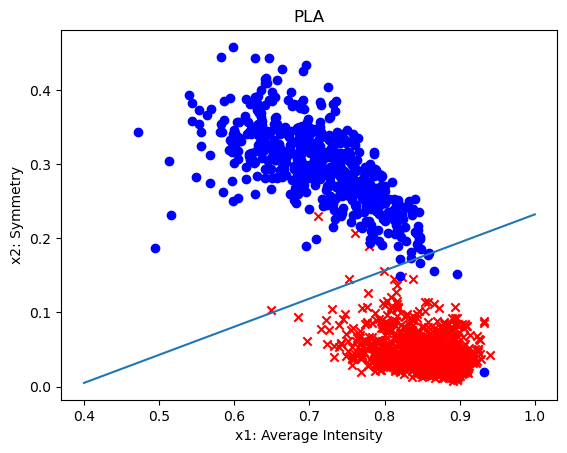

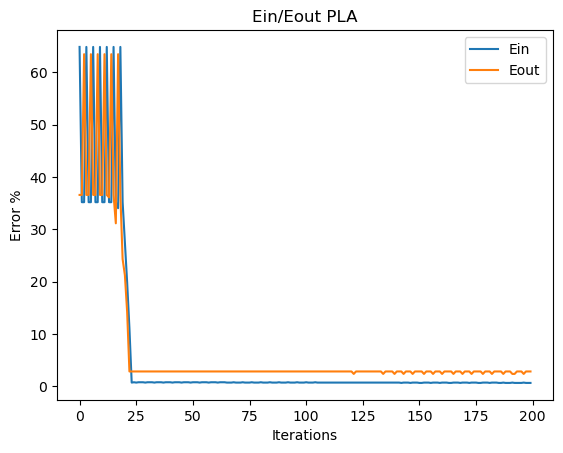

In [14]:
Ein,Eout, weight = perceptron(X_new, y_new,X_test_final,y_test_new, 200)
# Make a graph which represents a relation between Simmetry and intensity
x_line = np.linspace(0.4, 1, 100)
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
# Drawing a line to show the threshold in based of the w array that we got as a final result 
plt.plot(x_line, line(weight))
plt.title('PLA')
plt.xlabel('x1: Average Intensity')
plt.ylabel('x2: Symmetry')
plt.show()


# We make a graph which represents the relationship between epochs and error 
  
plt.title('Ein/Eout PLA')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()



In [15]:
# Minimal error with train data
min(Ein)

0.6406149903907752

In [16]:
# Minimal error with testing data
min(Eout)

2.358490566037736

In [17]:
weight

array([[ 283.10872703],
       [-731.3301515 ],
       [1930.93776293]])

<div style='text-align: center;'>
<span style="color:#000000; font-family: 'Times new roman'; font-weight: 700; font-size: 2em;"> 7. Implementation of the  pocket algorithm </span>
</div>

In [18]:
def pocket(input_data,y,input_data_test,y_test,max_iter,w=None):    
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]
    if w is None:        
        w = np.random.random(data.shape[1]).reshape(-1,1)    
    current = np.sign(data @ w)
    f = y.reshape(-1,1)
    y_test =y_test.reshape(-1,1)
    difference = (f != current)
    t = 0
    Ein = [2]
    Eout = [2]
    
    e=0
    for iteration in range(max_iter):
        for i in range(len(f)):
            if difference[i]:
                w[0]+=f[i]*data[i][0]
                w[1]+=f[i]*data[i][1]
                w[2]+=f[i]*data[i][2]
                t+=1
        current = np.sign(data @ w)
        difference = (f != current)
        # if the current error is lower than the last one, we save the weight array and the error
        if t/len(f) < Ein[-1]:
            e=t/len(f)
            wf=w.copy()
        # on the other side, if the current error is higher than the last one, we don´t save anything   
          
        Ein.append(e)
        t=0
    
    # When we finish all the iterations we make testing process and the error estimation
    # but it will be using the best result of w that was saved, and not only taking the last result 
    
        prediction_test = np.sign(data_test @ w)    
        difference_test=(y_test != prediction_test )
          
        for i in range(len(y_test)):
            if difference_test[i]:
                t+=1
        if t/len(y_test) < Eout[-1]:
            e=t/len(y_test)
            wf=w.copy()     
            
        Eout.append(e)
        t=0    
    Ein=[v*100 for v in Ein]
    Eout=[v*100 for v in Eout]
    return Ein,Eout,wf



<div style='text-align: center;'>
<span style="color:#000000; font-family: 'Times new roman'; font-weight: 700; font-size: 2em;"> 8. Results of the pocket algorithm </span>
</div>

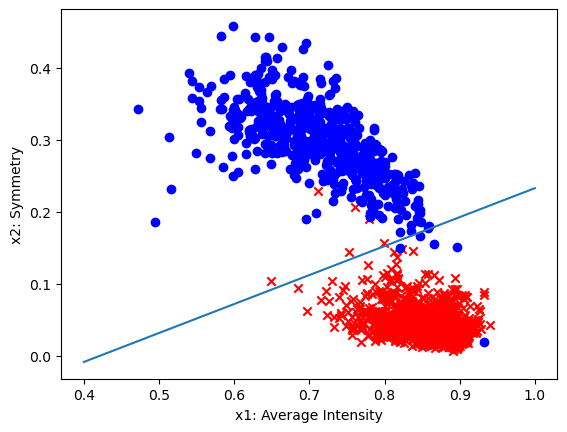

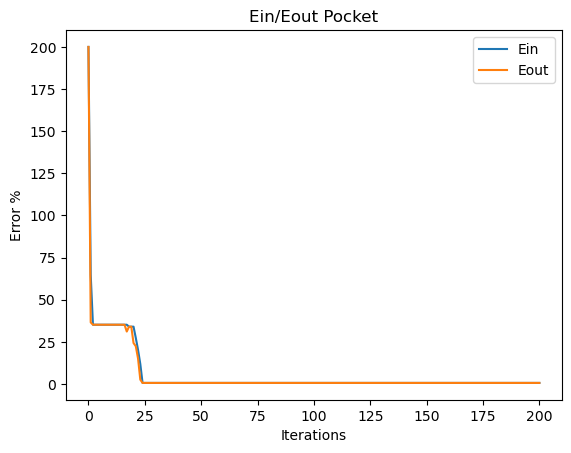

In [19]:
#Using pocket algorithm
Ein, Eout,w = pocket(X_new, y_new,X_test_final,y_test_new, 200)

#Ploting
plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.xlabel('x1: Average Intensity')
plt.ylabel('x2: Symmetry')
plt.show()


#Plot Ein and Eout 
plt.title('Ein/Eout Pocket')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()



In [20]:
# Minimal error with train data
min(Ein)

0.6406149903907752

In [21]:
# Minimal error with testing data
min(Eout)

0.6406149903907752

<div style='text-align: center;'>
<span style="color:#000000; font-family: 'Times new roman'; font-weight: 700; font-size: 2em;"> 9. Implementation of the linear regression model</span>
</div>

In [22]:
# Linear Regression
# We import linear regression model from sklearn module
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def lin(input_data,y,input_data_test,y_test,):
    
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    data_test = np.c_[np.ones((input_data_test.shape[0],1)), input_data_test]
    
    f = y.reshape(-1,1)
    y_test =y_test.reshape(-1,1)
    
    # We use the model
    modeloLinear = LinearRegression()
    modeloLinear.fit(X = input_data, y = y)
    # We get the wight array parameters
    w=np.array([modeloLinear.intercept_,modeloLinear.coef_[0],modeloLinear.coef_[1]]).reshape(-1,1)
    # make the current prediction for train and test
    prediction_train=np.sign(data @ w)
    prediction_test=np.sign(data_test @ w)
    # Finally, we estimate the error
    NMissClass=0
    difference = (f != prediction_train)
    for i in range(len(f)):
        if difference[i]:
            NMissClass+=1
    
    Ein=(NMissClass/len(f))*100
    NMissClass=0
    difference_test = (y_test != prediction_test)
    for i in range(len(y_test)):
        if difference_test[i]:
            NMissClass+=1
    Eout=(NMissClass/len(y_test))*100
    
    NMissClass=0
    
    
    return Ein,Eout,w


<div style='text-align: center;'>
<span style="color:#000000; font-family: 'Times new roman'; font-weight: 700; font-size: 2em;"> 10. Results using linear regression model & comparison vs pocket algorithm </span>
</div>

Ein LIN: 0.38436899423446513
Eout LIN: 2.1226415094339623


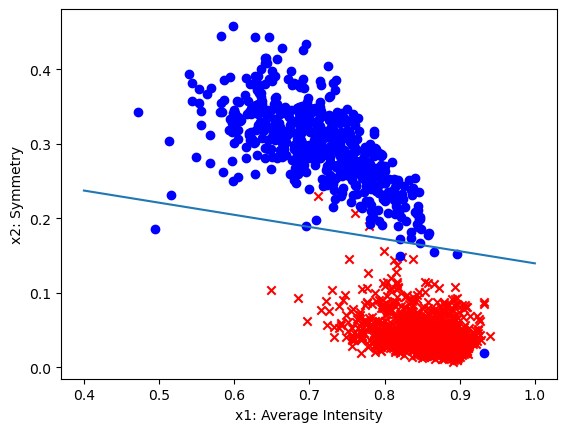

Ein Pocket: 0.3203074951953876
Eout Pocket: 0.3203074951953876


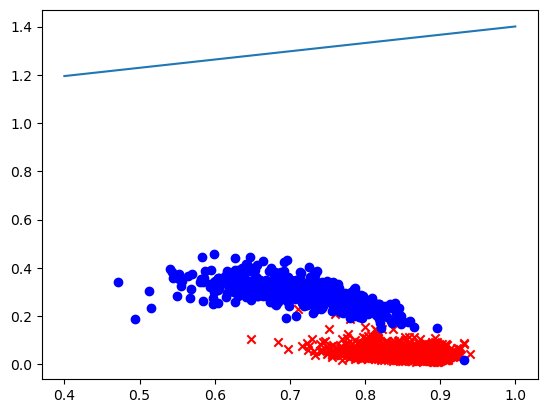

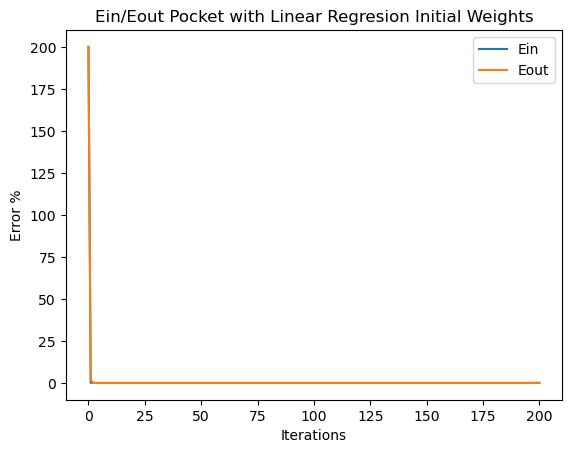

In [23]:
## Linear Regression VS pocket algorithm Results

# LINEAR REGRESSION

Ein, Eout,w = lin(X_new, y_new,X_test_final,y_test_new)
print('Ein LIN:',Ein)
print('Eout LIN:',Eout)

plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.xlabel('x1: Average Intensity')
plt.ylabel('x2: Symmetry')
plt.show()

## POCKET ALGORITHM 

Ein, Eout,w = pocket(X_new, y_new,X_test_final,y_test_new, 200,w)

print('Ein Pocket:',min(Ein))
print('Eout Pocket:',min(Eout))


plt.scatter(avg_intensity_Digit2, symm_Digit2, marker = 'x', color = 'red')
plt.scatter(avg_intensity_Digit1, symm_Digit1, marker='o', color = 'blue')
plt.plot(x_line, line(w))
plt.show()

#Plot Ein and Eout 
plt.title('Ein/Eout Pocket with Linear Regresion Initial Weights')
plt.xlabel('Iterations')
plt.ylabel('Error %')
plt.plot(Ein, label='Ein')
plt.plot(Eout, label = 'Eout')
plt.legend()
plt.show()
